<a href="https://colab.research.google.com/github/WolfgangHou/Crab_Age_Analysis/blob/main/Crab_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s3e16_path = kagglehub.competition_download('playground-series-s3e16')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


# 目標

透過分析螃蟹資料集，探索預測螃蟹年齡的重要參數與推測模型建置。

# 導入資料集

In [ ]:
df = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')

# 初步資料探索

In [ ]:
# 確認資料類型與資料缺失情況
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [ ]:
# 確認欄位名稱
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [ ]:
# 檢視資料概略內容
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [ ]:
# 確認類別型資料欄位數量與類別數量
cat_col = df.select_dtypes('object').columns
num_col = df.select_dtypes(exclude='object').columns

print(f'total cat_col no.: {len(cat_col)}')
for col in cat_col:
    print(
        f'unique values in {col} are {df[col].unique()}\n',
        f'total {df[col].nunique()} in {col}\n'
    )
# 確認數據型資料欄位數量
print(f'total num_col no.: {len(num_col)}')



total cat_col no.: 1
unique values in Sex are ['I' 'M' 'F']
 total 3 in Sex

total num_col no.: 9


In [ ]:
# 確認是否有重複資料
df.duplicated().sum()
# 無重複資料

0

In [ ]:
# 確認各欄位資料缺失情況
df.isnull().sum()
# 無缺失資料

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

經過初步探索，確認資料集沒有重複資料，也沒有缺失值。
共有9個數值型欄位、1個類別型欄位

# 資料視覺化

## 透過箱型圖確認各欄位資料分佈情況

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


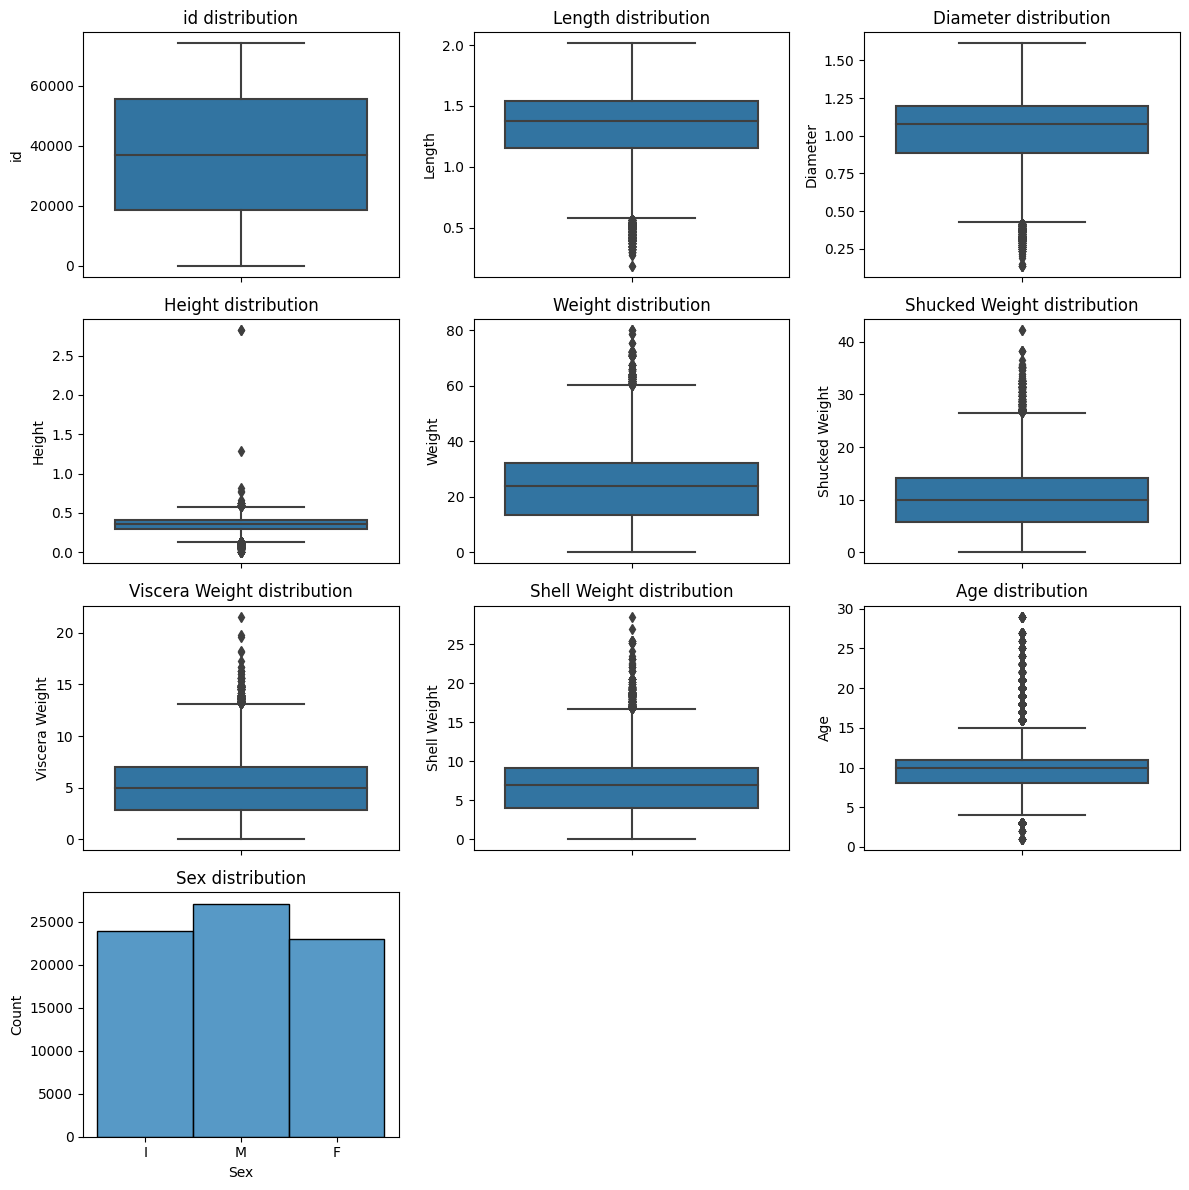

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(12,12))
axes = axes.ravel()
for i, col in enumerate(num_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} distribution')


for j, col in enumerate(cat_col, start=len(num_col)):
    sns.histplot(x=df[col], ax=axes[j])
    axes[j].set_title(f'{col} distribution')

for i in range(len(num_col)+len(cat_col), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

確認資料分佈情況
唯一的類別型資料"Sex"，性別分布上較為均勻
透過箱型圖確認各數值欄位的分佈情況

## 類別變數編碼
因唯一的性別欄位僅有三個類別，所以採用獨熱編碼進行轉換，便於後續視覺化與模型訓練。

In [ ]:
en_df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', dtype='int')
en_df.drop('id', axis=1, inplace=True)

In [ ]:
en_df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0


## 透過熱力圖探究與年齡相關度較高的變數

<Axes: >

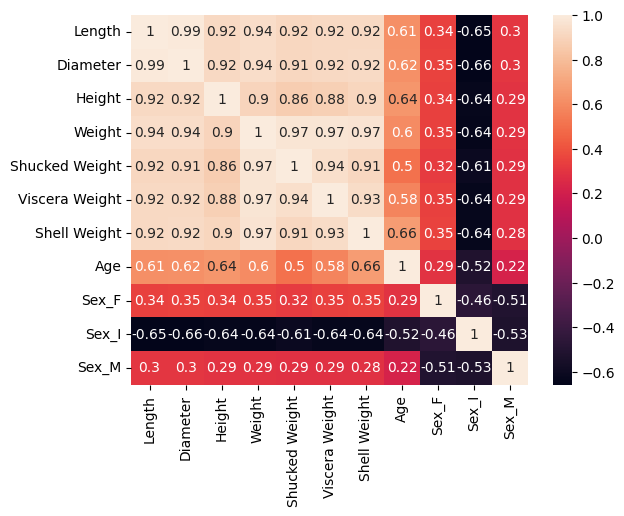

In [ ]:
sns.heatmap(en_df.corr(), annot=True)

從熱力圖看來，性別對於螃蟹年齡影響很低。

## 透過散布圖觀察不同特徵對於年齡的影響

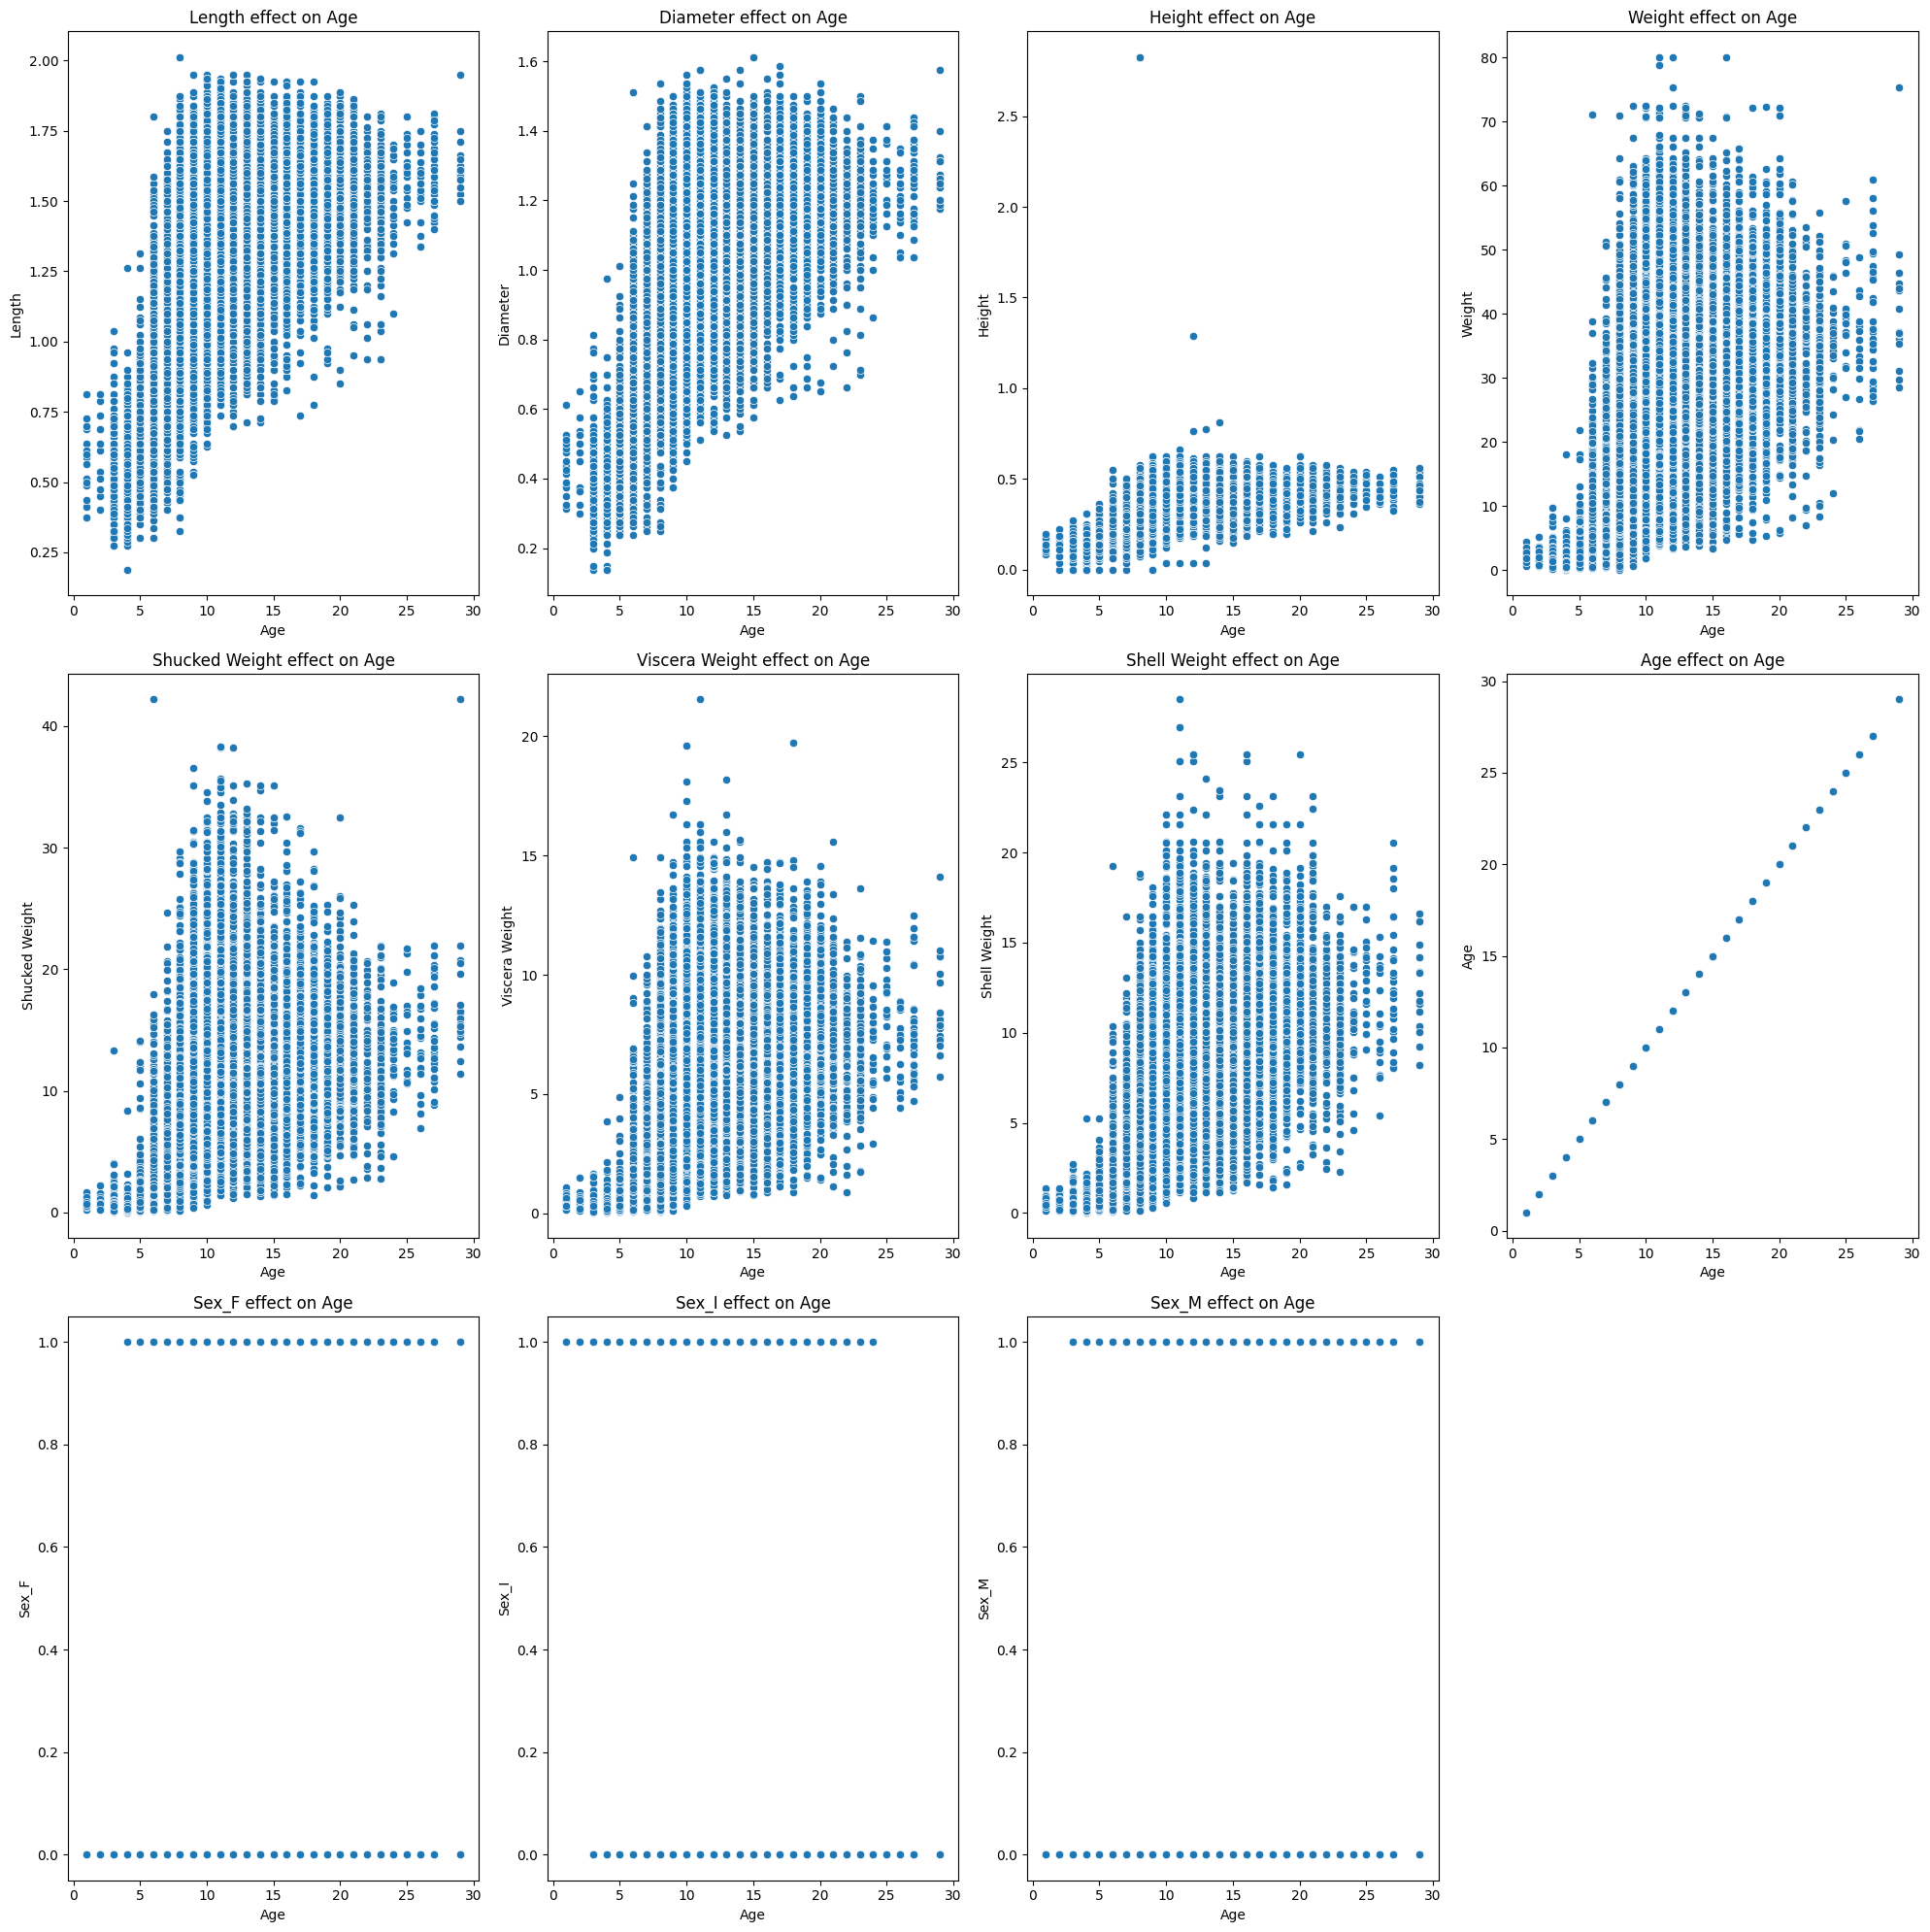

In [ ]:
def all_scatterplot(en_df):
    fig, axes = plt.subplots(3,4, figsize=(20, 20))
    axes = axes.ravel()
    for i, col in enumerate(en_df.columns):
        sns.scatterplot(x=en_df['Age'], y=en_df[col], ax=axes[i])
        axes[i].set_title(f'{col} effect on Age')

    for j in range(i+1,len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

all_scatterplot(en_df)

## 在散布圖內加入探討性別與年齡間的關係

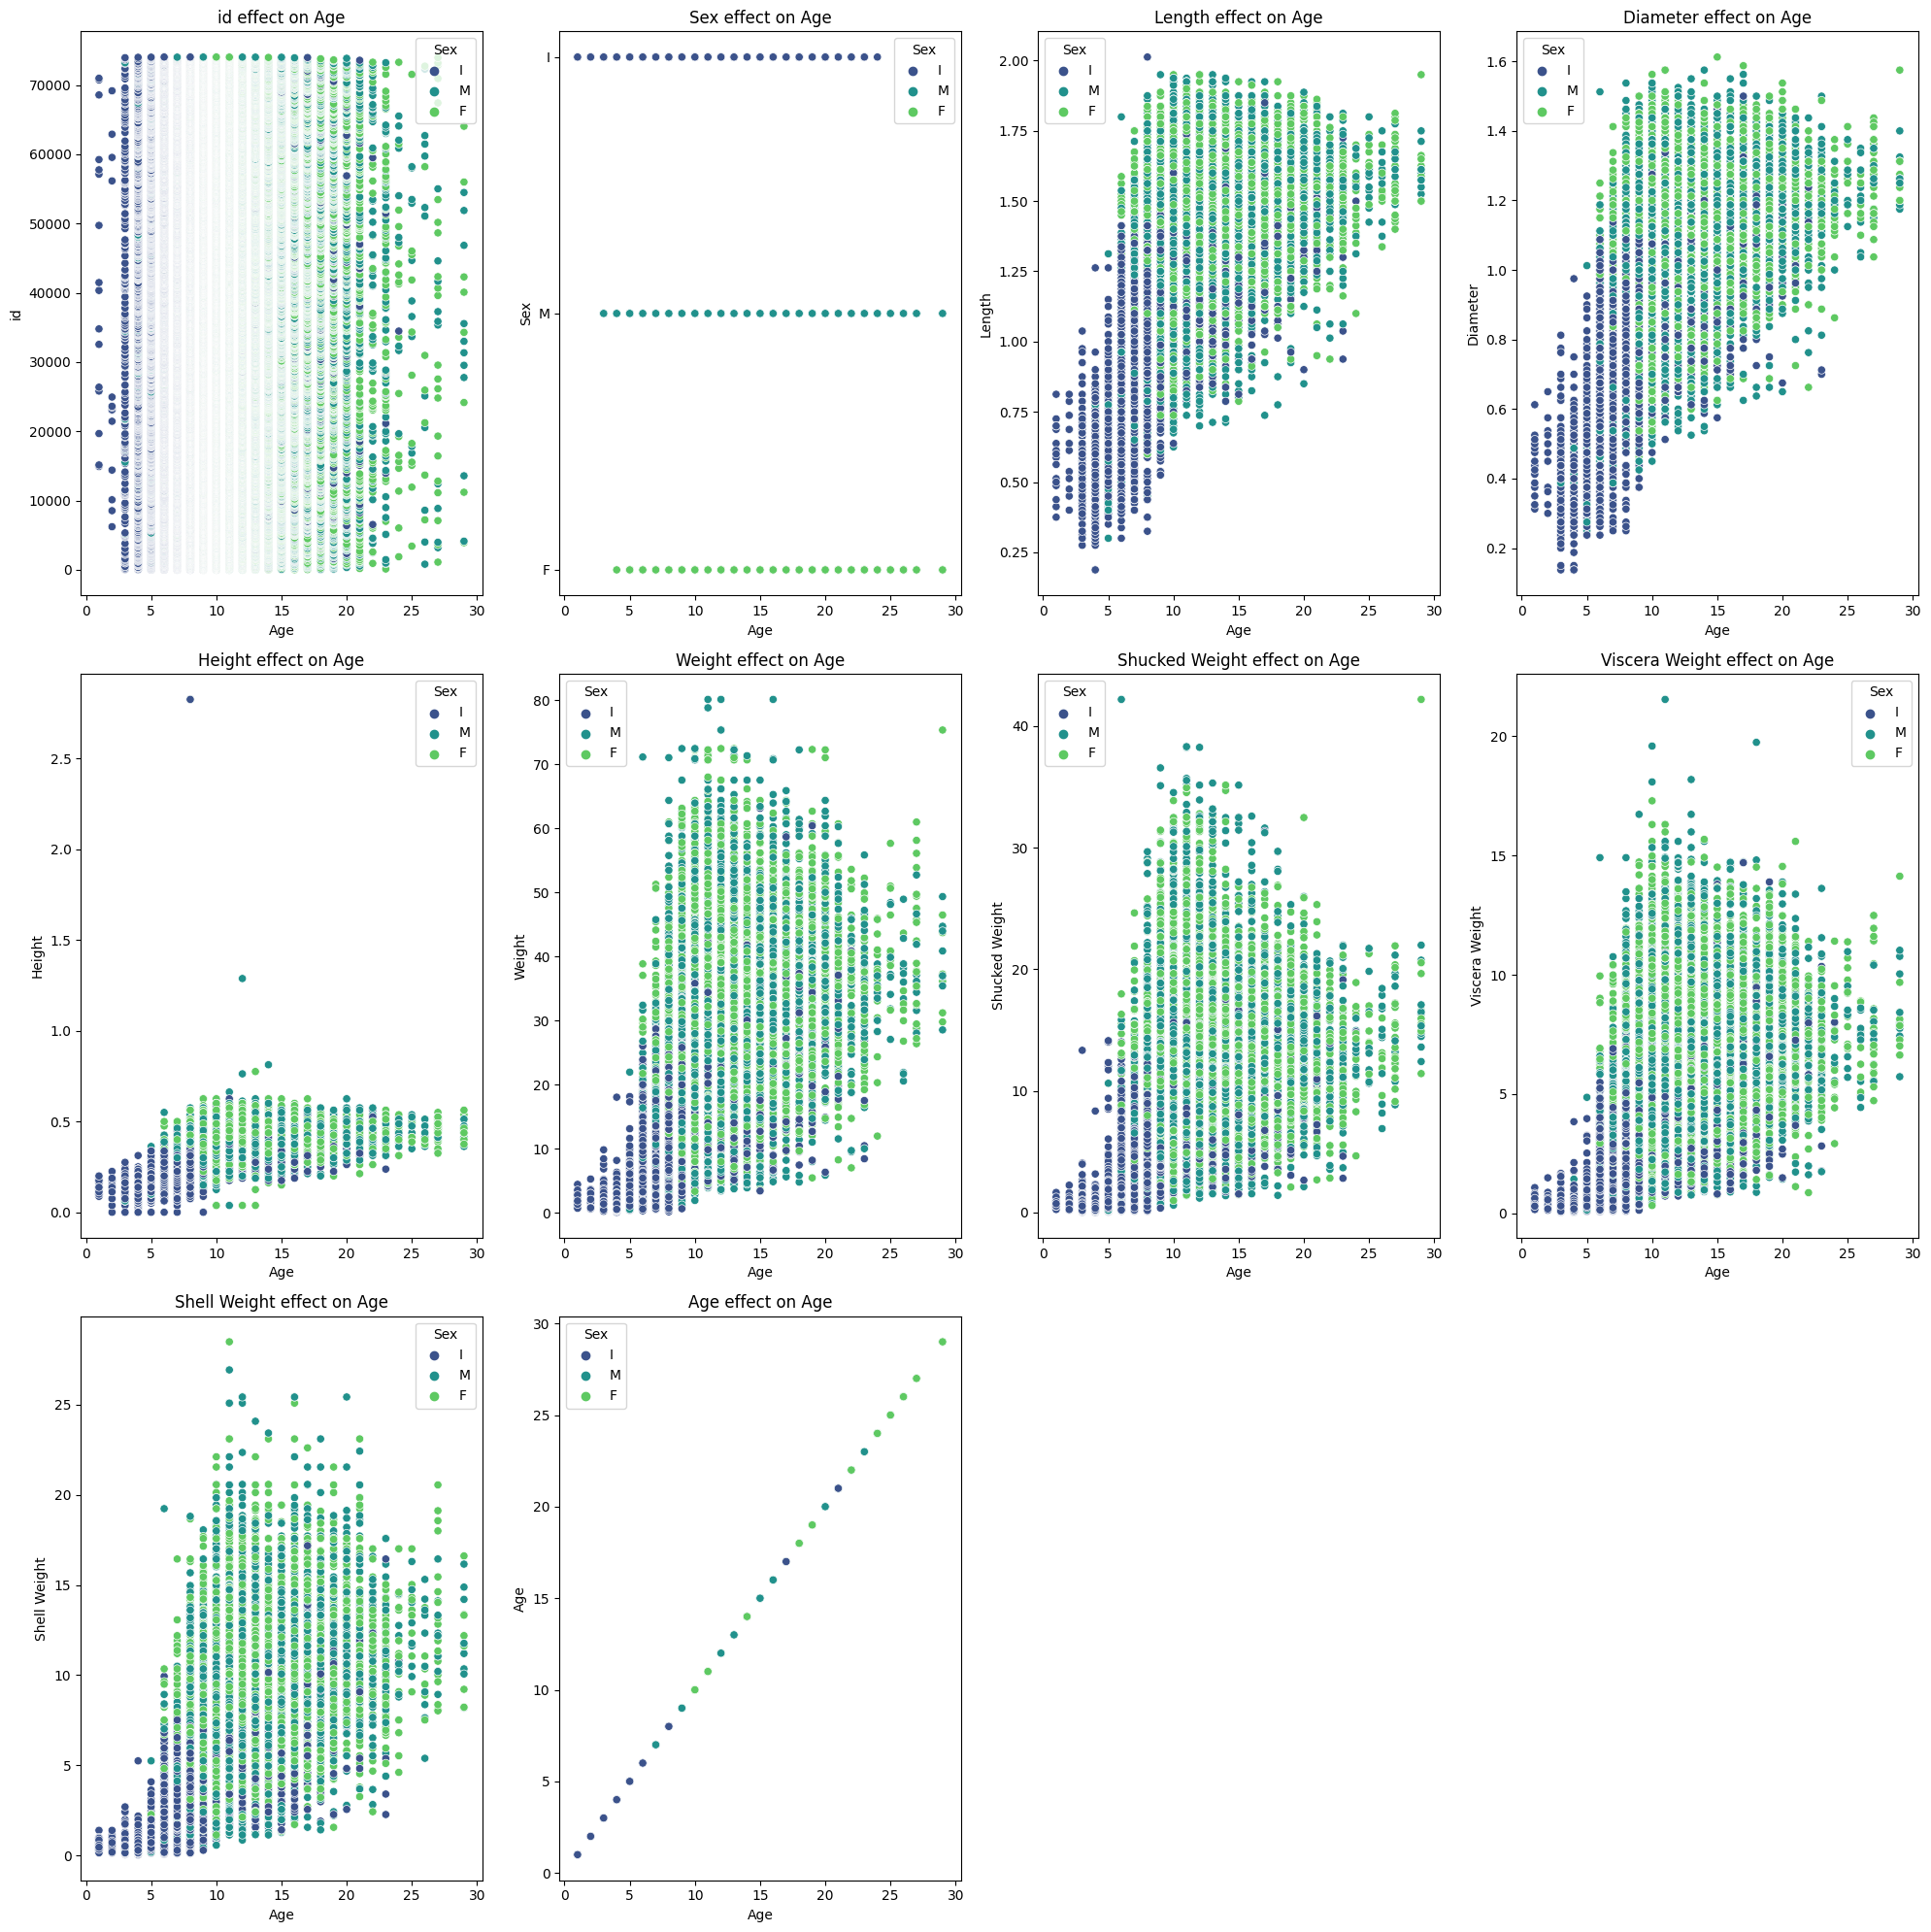

In [ ]:
def all_scatterplot_df(en_df):
    fig, axes = plt.subplots(3,4, figsize=(20, 20))
    axes = axes.ravel()
    for i, col in enumerate(en_df.columns):
        sns.scatterplot(x=en_df['Age'], y=en_df[col], ax=axes[i], hue=en_df['Sex'], palette='viridis')
        axes[i].set_title(f'{col} effect on Age')

    for j in range(i+1,len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

all_scatterplot_df(df)

大部分無性別資料在10之前，且公母性別在不同特徵-年紀的散步圖上沒有顯示明顯的差異趨勢，與熱力圖的結果相同。

## 透過箱型圖進一步確認不同特徵對於年齡的影響

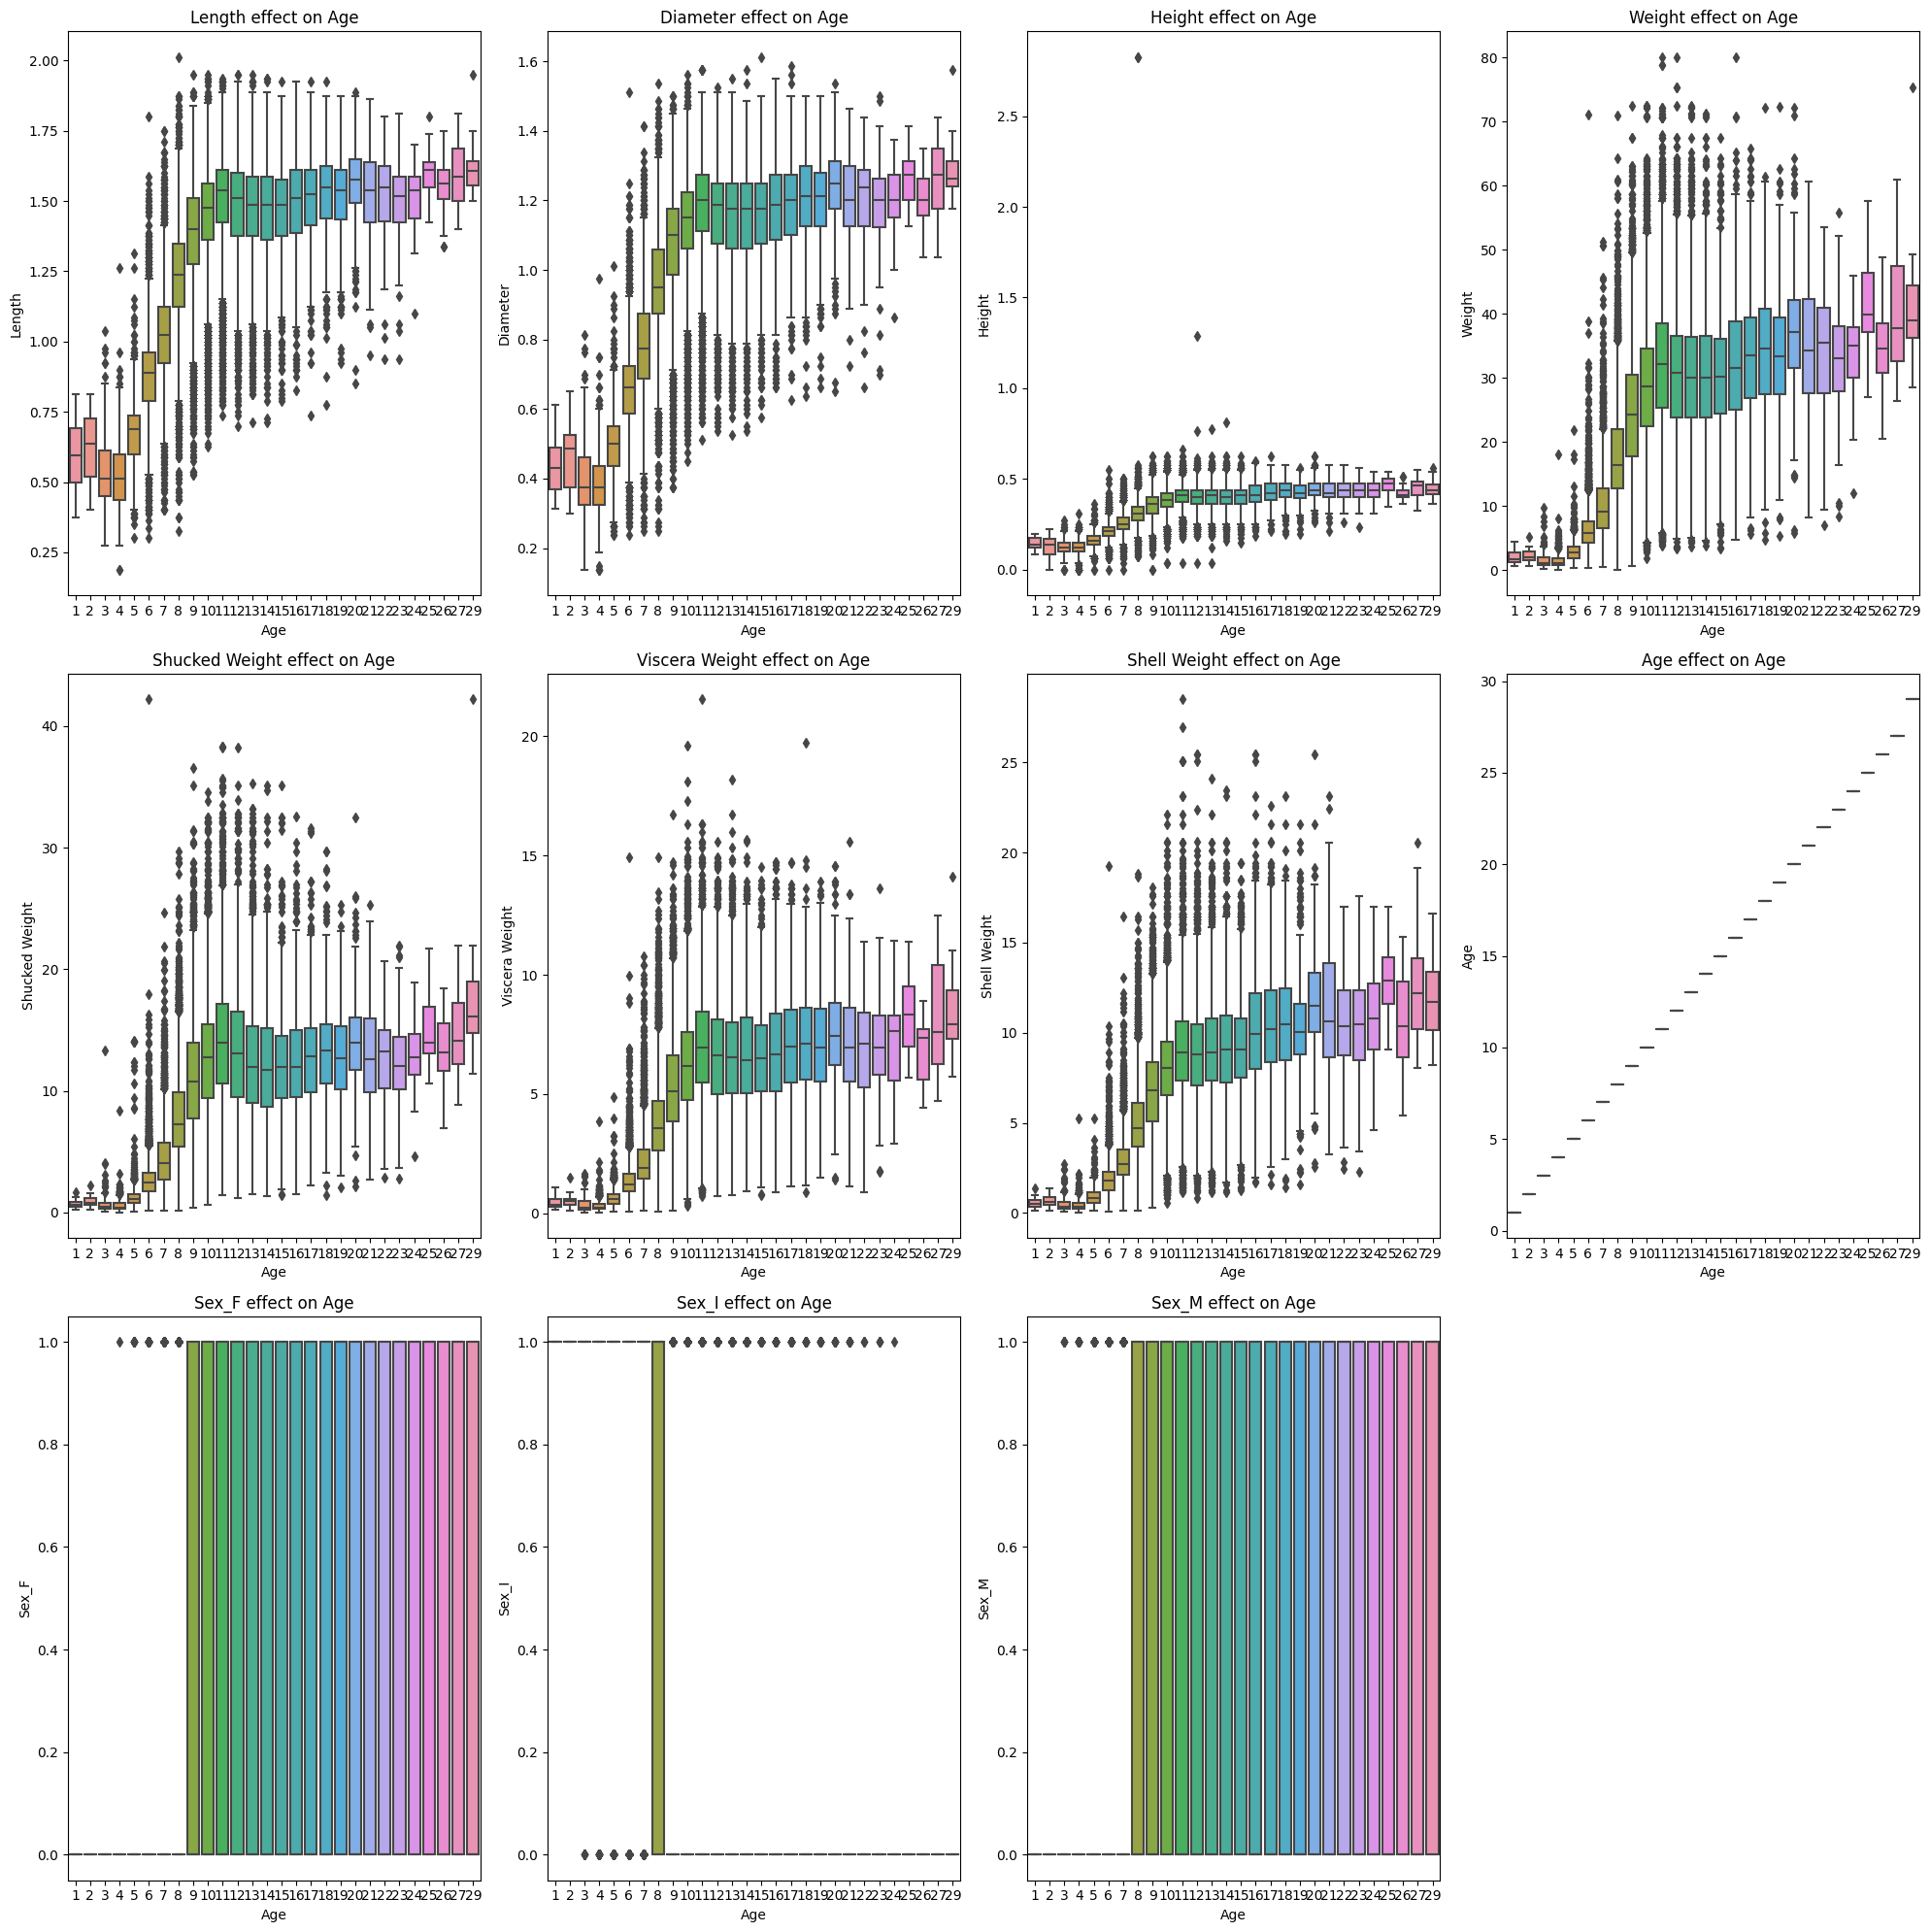

In [ ]:
def all_boxplot(en_df):
    fig, axes = plt.subplots(3,4, figsize=(20, 20))
    axes = axes.ravel()
    for i, col in enumerate(en_df.columns):
        sns.boxplot(x=en_df['Age'], y=en_df[col], ax=axes[i])
        axes[i].set_title(f'{col} effect on Age')

    for j in range(i+1,len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

all_boxplot(en_df)

除了甲殼高度之外，其他數據特徵均呈現兩段式趨勢，表示在一定年齡之後數值的變化趨緩。

# 離群值偵測

## 透過z score確認離群值的資料筆數與比例

In [ ]:
from scipy.stats import zscore

z_score = np.abs(zscore(df[num_col].drop('Age', axis=1)))


threshold=3

outlier_counts = (z_score > 3).sum(axis=0)
outlier_ratios = outlier_counts/len(df) *100

outlier_df = pd.DataFrame({
    'Outlier Count': outlier_counts,
    'Outlier Ration': outlier_ratios
})

outlier_df


,Outlier Count,Outlier Ration
id,0,0.000000
Length,491,0.663057
Diameter,256,0.345708
Height,160,0.216067
Weight,199,0.268734
Shucked Weight,269,0.363263
Viscera Weight,201,0.271435
Shell Weight,272,0.367314


因為離群值的佔比低，故不另外移除。

# 模型建置

## 線性回歸模型

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = en_df.drop('Age', axis = 1)
y = en_df['Age']

num_col = X.select_dtypes(exclude='object').columns

scaler = StandardScaler()

train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=True, test_size=0.2)

train_X[num_col] = scaler.fit_transform(train_X[num_col])
test_X[num_col] = scaler.transform(test_X[num_col])

lr_model=LinearRegression()

lr_model.fit(train_X, train_y)
prediction = lr_model.predict(test_X)
mae = mean_absolute_error(test_y, prediction)
mse = mean_squared_error(test_y, prediction)
r2 = r2_score(test_y, prediction)

print(
    'mae:',mae,'\n'
    'mse:', mse,'\n'
    'r2:',r2
)




mae: 1.4901795468210313 
mse: 4.680706044998172 
r2: 0.5412183624714233


## 隨機森林回歸模型

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = en_df.drop('Age', axis = 1)
y = en_df['Age']

num_col = X.select_dtypes(exclude='object').columns

scaler = StandardScaler()

train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=True, test_size=0.2)

train_X[num_col] = scaler.fit_transform(train_X[num_col])
test_X[num_col] = scaler.transform(test_X[num_col])

rf_model=RandomForestRegressor(n_estimators=300)

rf_model.fit(train_X, train_y)
prediction = rf_model.predict(test_X)
mae = mean_absolute_error(test_y, prediction)
mse = mean_squared_error(test_y, prediction)
r2 = r2_score(test_y, prediction)

print(
    'mae:',mae,'\n'
    'mse:', mse,'\n'
    'r2:',r2
)




mae: 1.475278959332028 
mse: 4.523519479515976 
r2: 0.5487436666927066


## XGBoost回歸

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = en_df.drop('Age', axis = 1)
y = en_df['Age']

num_col = X.select_dtypes(exclude='object').columns

scaler = StandardScaler()

train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=True, test_size=0.2)

train_X[num_col] = scaler.fit_transform(train_X[num_col])
test_X[num_col] = scaler.transform(test_X[num_col])

xg_model=xgb.XGBRegressor(objective='reg:squarederror')

xg_model.fit(train_X, train_y)
prediction = xg_model.predict(test_X)
mae = mean_absolute_error(test_y, prediction)
mse = mean_squared_error(test_y, prediction)
r2 = r2_score(test_y, prediction)

print(
    'mae:',mae,'\n'
    'mse:', mse,'\n'
    'r2:',r2
)




mae: 1.4366945224129914 
mse: 4.406911596541119 
r2: 0.561029445181126


In [ ]:
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(train_X, train_y)

# 預測與評估
predictions = model.predict(test_X)

mae = mean_absolute_error(test_y, prediction)
mse = mean_squared_error(test_y, prediction)
r2 = r2_score(test_y, prediction)

print(
    'mae:',mae,'\n'
    'mse:', mse,'\n'
    'r2:',r2
)


mae: 1.4190600125056083 
mse: 4.271521297007006 
r2: 0.5643849500695233


# 特徵重要性

## 線性回歸

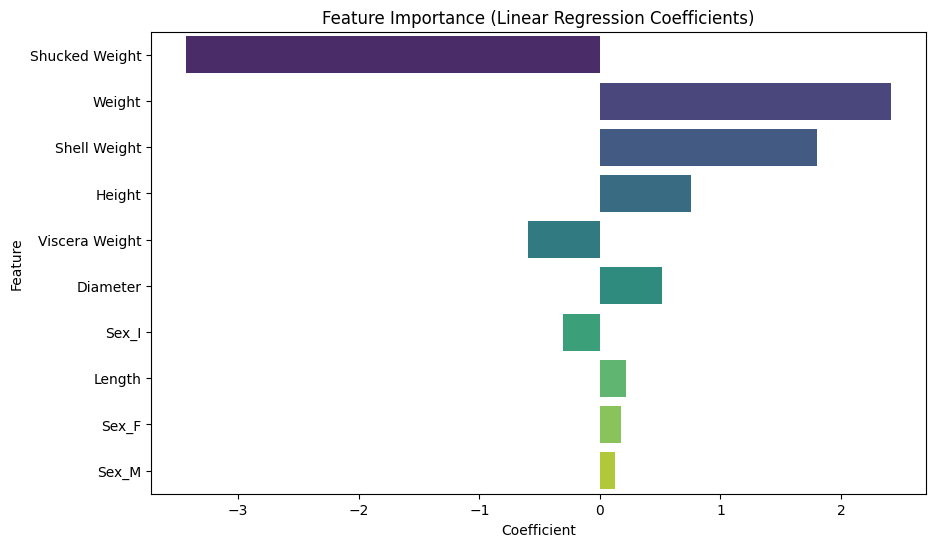

In [ ]:
# 特徵重要性分析
coef = pd.DataFrame({
    'Feature': train_X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# 繪製特徵重要性條形圖
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef, palette='viridis')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


## 隨機森林

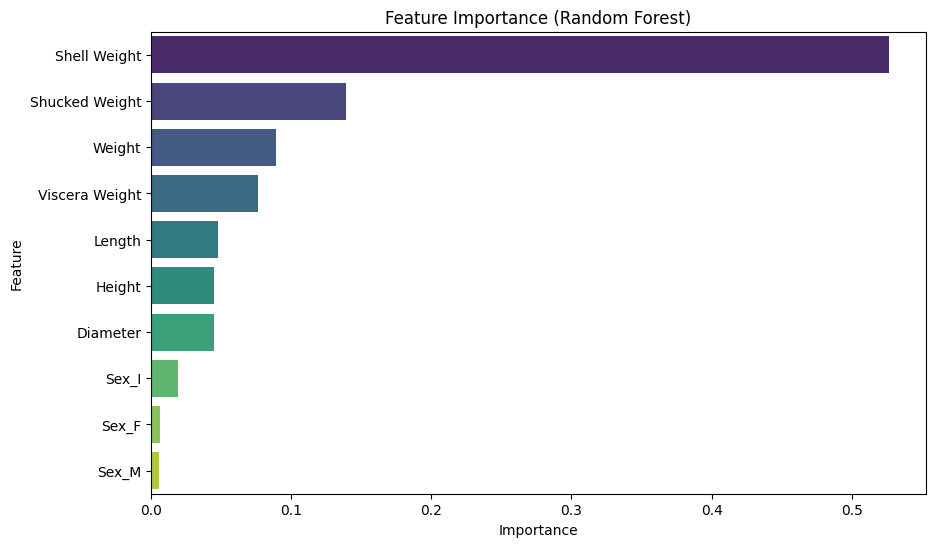

In [ ]:
importances = rf_model.feature_importances_
features = train_X.columns

# 特徵重要性排序
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 視覺化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## XGBoost

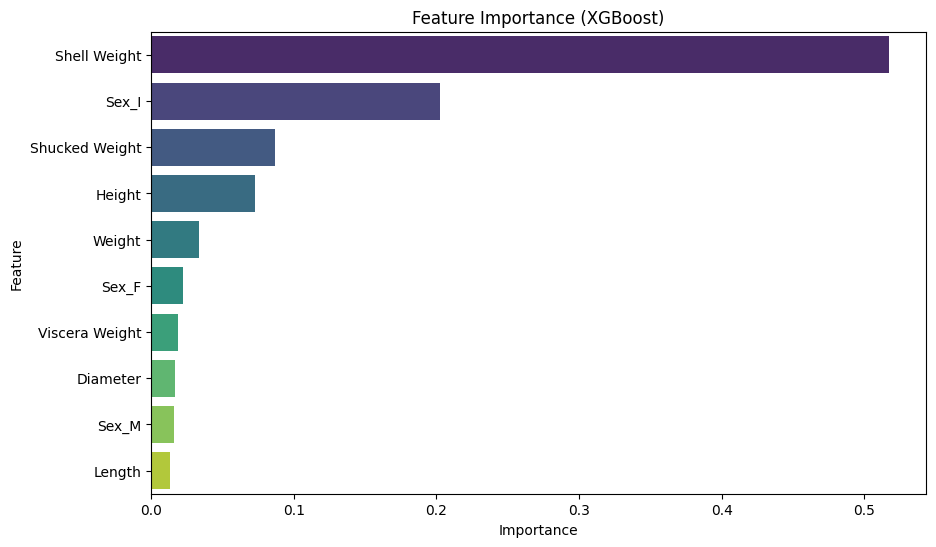

In [ ]:
importances = xg_model.feature_importances_
features = train_X.columns

# 特徵重要性排序
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 視覺化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# 結論

從特徵重要性看來，不管是重量、去殼重量、殼重對於螃蟹年齡預測具有相當重要的影響力。
後續模型的進一步優化或許可以透過使用以上三種數值特徵組合跟參數調整來提高模型預測能力。